In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('earthquakes.csv')

Correlations and Heatmaps
heatmap()
Last chapter, we saw how to create a correlation matrix heatmap using pandas and matplotlib (in this notebook). An easier way is to use seaborn:

<Axes: >

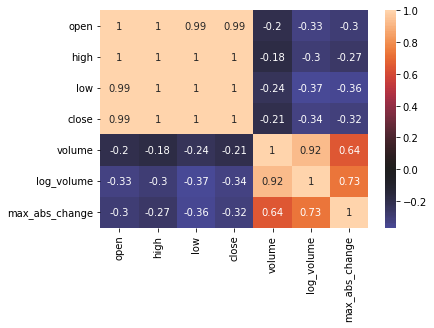

In [2]:
sns.heatmap(
    fb.sort_index().assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr(),
    annot=True, center=0
)

pairplot()
The pair plot is seaborn's answer to the scatter matrix we saw in chapter 5 (pandas.plotting.scatter_matrix()) in this notebook:

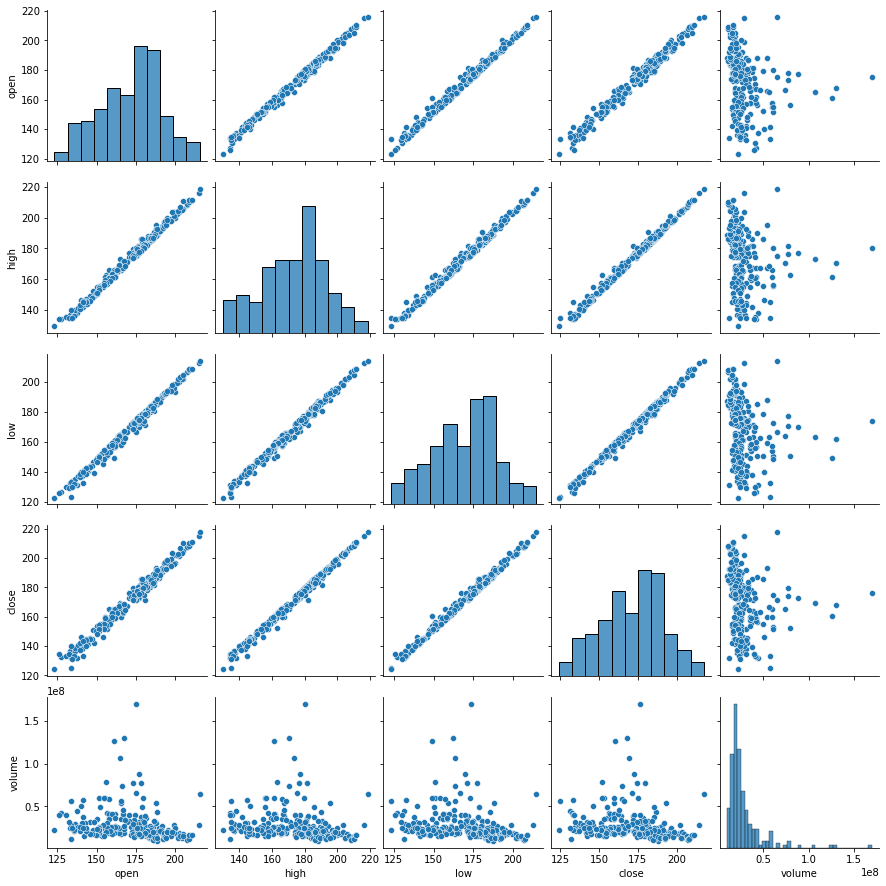

In [3]:
sns.pairplot(fb)

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the same shape):

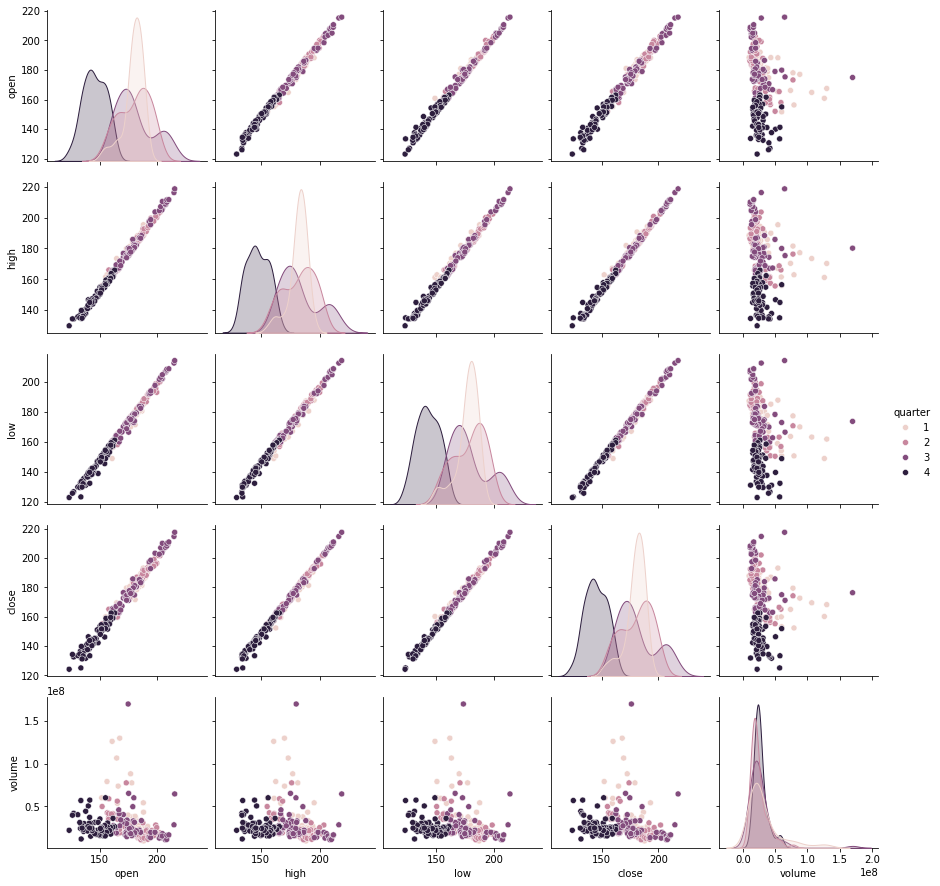

In [4]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

jointplot()
The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

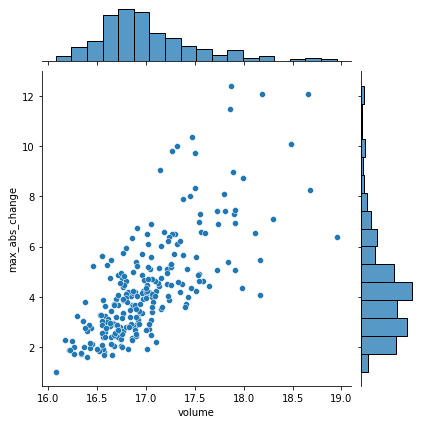

In [5]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

By changing the kind argument, we can change how the center of the plot is displayed. For example, we can pass kind='hex' for hexbins:

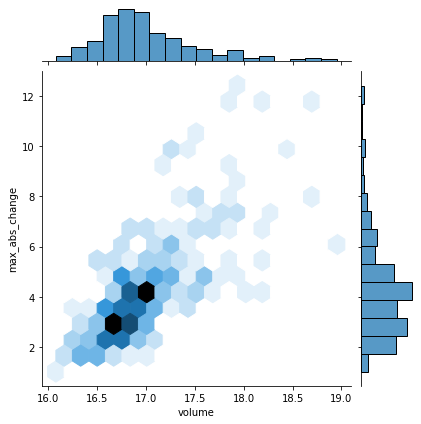

In [6]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

If we specify kind='reg' instead, we get a regression line in the center and KDEs on the sides:

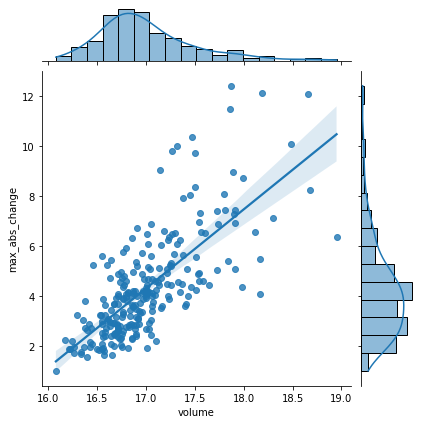

In [7]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

If we pass kind='resid', we get the residuals from the aforementioned regression:

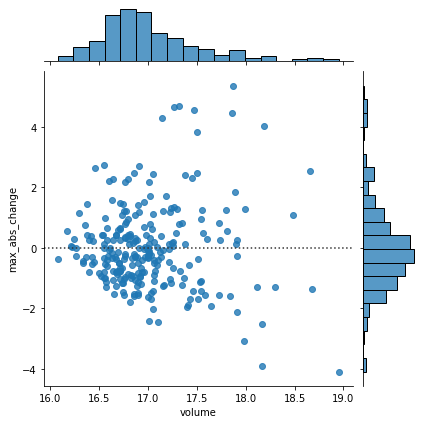

In [8]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Finally, if we pass kind='kde', we get a contour plot of the joint density estimate with KDEs along the sides:

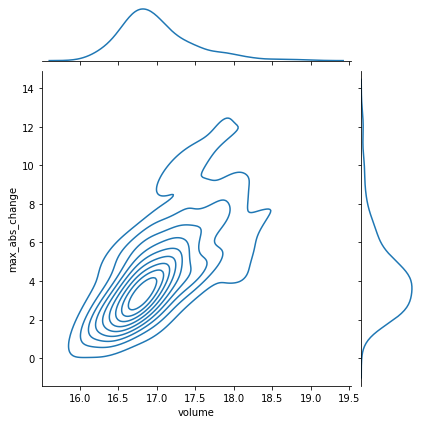

In [9]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Regression plots
We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high stock price - daily low stock price). To do so, we first need to isolate this data:

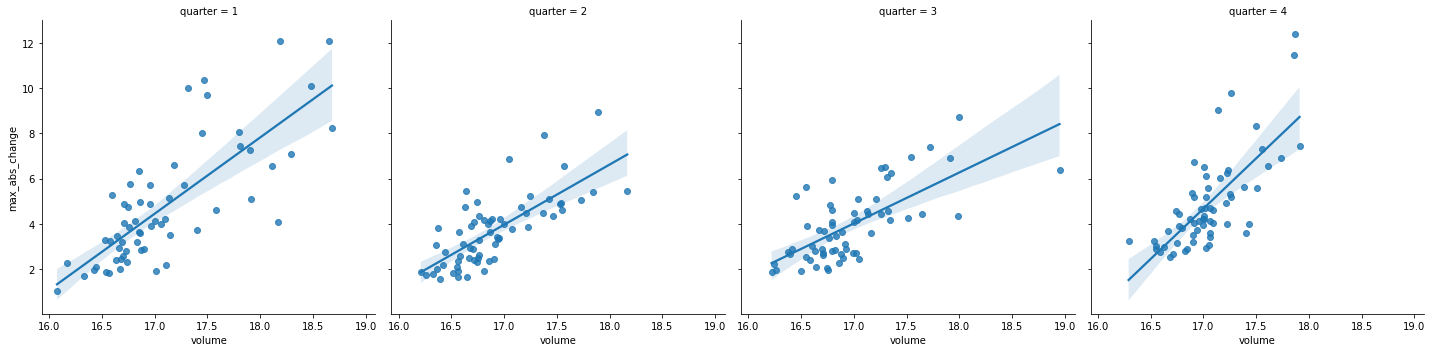

In [10]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

Distributions
Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5 (in this notebook).

boxenplot()
The boxenplot is a box plot that shows additional quantiles

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

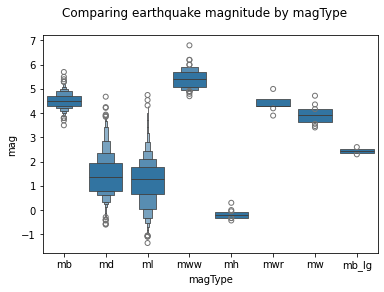

In [11]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

violinplot()
Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

/tmp/ipykernel_1084/535622317.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

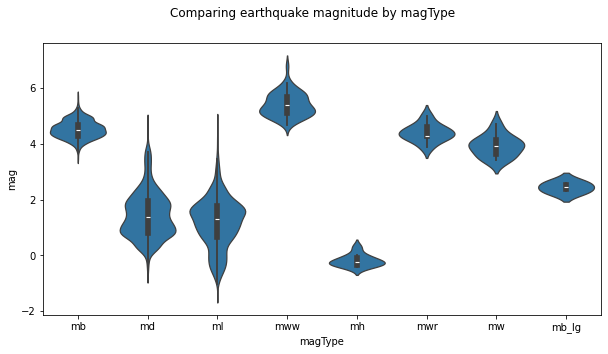

In [12]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],  
    ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')